<a href="https://colab.research.google.com/github/gopaljigupta45/CREDIT_CARD_DEFAULT_PREDICTION/blob/main/Credit_Card_Default_Prediction_GOPAL_JI_GUPTA_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b><u> Project Title : Predicting whether a customer will default on his/her credit card </u></b>

## <b> Problem Description </b>

### This project is aimed at predicting the case of customers default payments in Taiwan. From the perspective of risk management, the result of predictive accuracy of the estimated probability of default will be more valuable than the binary result of classification - credible or not credible clients. We can use the [K-S chart](https://www.listendata.com/2019/07/KS-Statistics-Python.html) to evaluate which customers will default on their credit card payments


## <b> Data Description </b>

### <b>Attribute Information: </b>

### This research employed a binary variable, default payment (Yes = 1, No = 0), as the response variable. This study reviewed the literature and used the following 23 variables as explanatory variables:
* ### X1: Amount of the given credit (NT dollar): it includes both the individual consumer credit and his/her family (supplementary) credit.
* ### X2: Gender (1 = male; 2 = female).
* ### X3: Education (1 = graduate school; 2 = university; 3 = high school; 4 = others).
* ### X4: Marital status (1 = married; 2 = single; 3 = others).
* ### X5: Age (year).
* ### X6 - X11: History of past payment. We tracked the past monthly payment records (from April to September, 2005) as follows: X6 = the repayment status in September, 2005; X7 = the repayment status in August, 2005; . . .;X11 = the repayment status in April, 2005. The measurement scale for the repayment status is: -1 = pay duly; 1 = payment delay for one month; 2 = payment delay for two months; . . .; 8 = payment delay for eight months; 9 = payment delay for nine months and above.
* ### X12-X17: Amount of bill statement (NT dollar). X12 = amount of bill statement in September, 2005; X13 = amount of bill statement in August, 2005; . . .; X17 = amount of bill statement in April, 2005.
* ### X18-X23: Amount of previous payment (NT dollar). X18 = amount paid in September, 2005; X19 = amount paid in August, 2005; . . .;X23 = amount paid in April, 2005.

## **Loading the Data and libraries.**

---



In [457]:
# Importing the libraries we'll need.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import os
import sys
import warnings
warnings.filterwarnings('ignore')

In [458]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [459]:
# Upgrading the python version to read the dataset which is in excel file format.
!pip install --upgrade xlrd

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [460]:
# loading the data
df = pd.read_excel('/content/drive/MyDrive/Credit Card Default Prediction/default of credit card clients.xls', header=1)

In [461]:
# checking what the data looks like
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [462]:
# checking the shape of the dataframe
df.shape

(30000, 25)

As we can see that we have around 30000 rows and 25 columns in our dataset.

In [463]:
# since there are too many columns in the dataframe, we are not able to see all of them. 
# we can remedy this using set_option function.
pd.set_option('display.max_columns', None)

In [464]:
# Now, we should be able to see all columns. Checking the last few instances.
df.tail()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
29995,29996,220000,1,3,1,39,0,0,0,0,0,0,188948,192815,208365,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29996,29997,150000,1,3,2,43,-1,-1,-1,-1,0,0,1683,1828,3502,8979,5190,0,1837,3526,8998,129,0,0,0
29997,29998,30000,1,2,2,37,4,3,2,-1,0,0,3565,3356,2758,20878,20582,19357,0,0,22000,4200,2000,3100,1
29998,29999,80000,1,3,1,41,1,-1,0,0,0,-1,-1645,78379,76304,52774,11855,48944,85900,3409,1178,1926,52964,1804,1
29999,30000,50000,1,2,1,46,0,0,0,0,0,0,47929,48905,49764,36535,32428,15313,2078,1800,1430,1000,1000,1000,1


## **Understanding our features and the data it contains in detail.**

---




1. ID: ID of each client (unique identifier)
2. LIMIT_BAL: Amount of given credit in NT dollars (includes individual and family/supplementary credit)
3. SEX: Gender (1=male, 2=female)
4. EDUCATION: (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown)
5. MARRIAGE: Marital status (1=married, 2=single, 3=others)
6. AGE: Age in years
7. PAY_0: Repayment status in September, 2005 (-2 = Unused,-1=pay duly,0=Revolving Credit, 1=payment delay for one month, 2=payment delay for two months,8=payment delay for eight months, 9=payment delay for nine months and above)
8. PAY_2: Repayment status in August, 2005 (scale same as above)
9.PAY_3: Repayment status in July, 2005 (scale same as above)
10.PAY_4: Repayment status in June, 2005 (scale same as above)
11.PAY_5: Repayment status in May, 2005 (scale same as above)
12.PAY_6: Repayment status in April, 2005 (scale same as above)
13.BILL_AMT1: Amount of bill statement in September, 2005 (NT dollar)
14.BILL_AMT2: Amount of bill statement in August, 2005 (NT dollar)
15.BILL_AMT3: Amount of bill statement in July, 2005 (NT dollar)
16.BILL_AMT4: Amount of bill statement in June, 2005 (NT dollar)
17.BILL_AMT5: Amount of bill statement in May, 2005 (NT dollar)
18.BILL_AMT6: Amount of bill statement in April, 2005 (NT dollar)
19.PAY_AMT1: Amount of previous payment in September, 2005 (NT dollar)
20.PAY_AMT2: Amount of previous payment in August, 2005 (NT dollar)
21.PAY_AMT3: Amount of previous payment in July, 2005 (NT dollar)
22.PAY_AMT4: Amount of previous payment in June, 2005 (NT dollar)
23.PAY_AMT5: Amount of previous payment in May, 2005 (NT dollar)
24.PAY_AMT6: Amount of previous payment in April, 2005 (NT dollar)
25.default.payment.next.month: Default payment (1=yes, 0=no)


## **Data Preprocessing.**

---



In [465]:
# Let's rename the columns for better understanding.
df.rename(columns={'PAY_0':'REPAY_STATUS_SEPT','PAY_2':'REPAY_STATUS_AUG','PAY_3':
                   'REPAY_STATUS_JUL','PAY_4':'REPAY_STATUS_JUN','PAY_5':'REPAY_STATUS_MAY','PAY_6':'REPAY_STATUS_APR'},inplace=True)

df.rename(columns={'BILL_AMT1':'BILL_AMT_SEPT','BILL_AMT2':'BILL_AMT_AUG',
                   'BILL_AMT3':'BILL_AMT_JUL','BILL_AMT4':'BILL_AMT_JUN','BILL_AMT5':'BILL_AMT_MAY','BILL_AMT6':'BILL_AMT_APR'}, inplace = True)

df.rename(columns={'PAY_AMT1':'PRE_PAY_AMT_SEPT','PAY_AMT2':'PRE_PAY_AMT_AUG','PAY_AMT3':'PRE_PAY_AMT_JUL',
                   'PAY_AMT4':'PRE_PAY_AMT_JUN','PAY_AMT5':'PRE_PAY_AMT_MAY','PAY_AMT6':'PRE_PAY_AMT_APR'},inplace=True)


In [466]:
# checking for null values in our dataframe.
df.isna().sum()

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
REPAY_STATUS_SEPT             0
REPAY_STATUS_AUG              0
REPAY_STATUS_JUL              0
REPAY_STATUS_JUN              0
REPAY_STATUS_MAY              0
REPAY_STATUS_APR              0
BILL_AMT_SEPT                 0
BILL_AMT_AUG                  0
BILL_AMT_JUL                  0
BILL_AMT_JUN                  0
BILL_AMT_MAY                  0
BILL_AMT_APR                  0
PRE_PAY_AMT_SEPT              0
PRE_PAY_AMT_AUG               0
PRE_PAY_AMT_JUL               0
PRE_PAY_AMT_JUN               0
PRE_PAY_AMT_MAY               0
PRE_PAY_AMT_APR               0
default payment next month    0
dtype: int64


 **We can clearly see from above that there are no null values in our dataset.**



In [467]:
# checking some basic info about our dataset.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   ID                          30000 non-null  int64
 1   LIMIT_BAL                   30000 non-null  int64
 2   SEX                         30000 non-null  int64
 3   EDUCATION                   30000 non-null  int64
 4   MARRIAGE                    30000 non-null  int64
 5   AGE                         30000 non-null  int64
 6   REPAY_STATUS_SEPT           30000 non-null  int64
 7   REPAY_STATUS_AUG            30000 non-null  int64
 8   REPAY_STATUS_JUL            30000 non-null  int64
 9   REPAY_STATUS_JUN            30000 non-null  int64
 10  REPAY_STATUS_MAY            30000 non-null  int64
 11  REPAY_STATUS_APR            30000 non-null  int64
 12  BILL_AMT_SEPT               30000 non-null  int64
 13  BILL_AMT_AUG                30000 non-null  int64
 14  BILL_A

In [468]:
# Checking some desriptive statistics.
df.describe(include='all')

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,REPAY_STATUS_SEPT,REPAY_STATUS_AUG,REPAY_STATUS_JUL,REPAY_STATUS_JUN,REPAY_STATUS_MAY,REPAY_STATUS_APR,BILL_AMT_SEPT,BILL_AMT_AUG,BILL_AMT_JUL,BILL_AMT_JUN,BILL_AMT_MAY,BILL_AMT_APR,PRE_PAY_AMT_SEPT,PRE_PAY_AMT_AUG,PRE_PAY_AMT_JUL,PRE_PAY_AMT_JUN,PRE_PAY_AMT_MAY,PRE_PAY_AMT_APR,default payment next month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,-0.266200,-0.291100,51223.330900,49179.075167,4.701315e+04,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,1.133187,1.149988,73635.860576,71173.768783,6.934939e+04,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-165580.000000,-69777.000000,-1.572640e+05,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,3558.750000,2984.750000,2.666250e+03,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,22381.500000,21200.000000,2.008850e+04,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,67091.000000,64006.250000,6.016475e+04,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,964511.000000,983931.000000,1.664089e+06,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


In [469]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,REPAY_STATUS_SEPT,REPAY_STATUS_AUG,REPAY_STATUS_JUL,REPAY_STATUS_JUN,REPAY_STATUS_MAY,REPAY_STATUS_APR,BILL_AMT_SEPT,BILL_AMT_AUG,BILL_AMT_JUL,BILL_AMT_JUN,BILL_AMT_MAY,BILL_AMT_APR,PRE_PAY_AMT_SEPT,PRE_PAY_AMT_AUG,PRE_PAY_AMT_JUL,PRE_PAY_AMT_JUN,PRE_PAY_AMT_MAY,PRE_PAY_AMT_APR,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [470]:
# checking for duplicate data in our df.
print(len(df[df.duplicated()]))
df[df.duplicated()]

0


,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,REPAY_STATUS_SEPT,REPAY_STATUS_AUG,REPAY_STATUS_JUL,REPAY_STATUS_JUN,REPAY_STATUS_MAY,REPAY_STATUS_APR,BILL_AMT_SEPT,BILL_AMT_AUG,BILL_AMT_JUL,BILL_AMT_JUN,BILL_AMT_MAY,BILL_AMT_APR,PRE_PAY_AMT_SEPT,PRE_PAY_AMT_AUG,PRE_PAY_AMT_JUL,PRE_PAY_AMT_JUN,PRE_PAY_AMT_MAY,PRE_PAY_AMT_APR,default payment next month


**So there is no duplicate data in our dataframe.**

In [471]:
# now let's save this data before operating on it.
credit_card_df = df.copy()

## **EXPLORATORY DATA ANALYSIS**

---



In [472]:
# Although the data in our df in all numerical, there are some categorical variables present in our dataset in encoded form.
# Exploring our dependent variable.
# first lets rename our dependent variable.
df.rename(columns={'default payment next month' : 'is_defaulter'}, inplace=True)

Text(0.5, 0, 'Graph denoting the no. of defaulters vs non-defaulters')

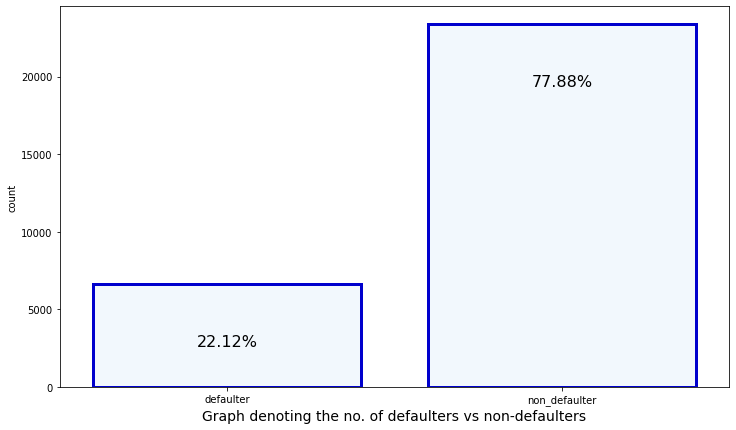

In [473]:
# plotting the value counts of our DV
plt.figure(figsize=(12,7))
ax = sns.countplot(df['is_defaulter'].replace({0:'non_defaulter',1:'defaulter'}), color = 'aliceblue', edgecolor='mediumblue', lw=3)

# df['is_defaulter'].value_counts().plot(kind='pie',autopct='%1.3f%%', legend=True)
for p in ax.patches:                               # This step is used for showing the percentage on the graph
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2, height-4000, '{:1.2f}''%'.format(height/df.shape[0]*100),ha = "center", fontsize= 16)
plt.xlabel('Graph denoting the no. of defaulters vs non-defaulters', fontsize=14)

**We can see from the above graph and value counts, that we have a unbalanced dataset. The no. of instances for class 0 is significantly higher than class 1**

In [474]:
df.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE',
       'REPAY_STATUS_SEPT', 'REPAY_STATUS_AUG', 'REPAY_STATUS_JUL',
       'REPAY_STATUS_JUN', 'REPAY_STATUS_MAY', 'REPAY_STATUS_APR',
       'BILL_AMT_SEPT', 'BILL_AMT_AUG', 'BILL_AMT_JUL', 'BILL_AMT_JUN',
       'BILL_AMT_MAY', 'BILL_AMT_APR', 'PRE_PAY_AMT_SEPT', 'PRE_PAY_AMT_AUG',
       'PRE_PAY_AMT_JUL', 'PRE_PAY_AMT_JUN', 'PRE_PAY_AMT_MAY',
       'PRE_PAY_AMT_APR', 'is_defaulter'],
      dtype='object')

In [475]:
# Now, we have several other categorical columns like marriage, education, sex. 
# Let's check them and see the relationship with our dependent variable.  
df['MARRIAGE'].value_counts()

2    15964
1    13659
3      323
0       54
Name: MARRIAGE, dtype: int64

In [476]:
df['SEX'].value_counts()

2    18112
1    11888
Name: SEX, dtype: int64

In [477]:
df['EDUCATION'].value_counts()

2    14030
1    10585
3     4917
5      280
4      123
6       51
0       14
Name: EDUCATION, dtype: int64

**In the education variable, as per our data description, 1 refers to graduate school, 2 refers to university etc.  however we have no understanding of some numbers present. so we will replace these will others**.

**Similarly, in our marriage variable, there is a 0 value which has unknown meaning. so we will add that to others.**

In [478]:
# As we can see that there are numerical values in these variables. so lets replace them with their original meanings.
# Although these variables have been label encoded, passing them to our models as they are will affect our accuracy
# we will need to do one hot encoding for these variables.
df.replace({'SEX': {1 : 'MALE', 2 : 'FEMALE'},
                   'EDUCATION' : {1 : 'graduate school', 2 : 'university', 3 : 'high school', 4 : 'others', 5:'others',6:'others', 0:'others'},
                   'MARRIAGE' : {1 : 'married', 2 : 'single', 3 : 'others', 0 : 'others'}, 'is_defaulter' :{1:'defaulter',0:'non-defaulter'}}, 
                   inplace = True )

In [479]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,REPAY_STATUS_SEPT,REPAY_STATUS_AUG,REPAY_STATUS_JUL,REPAY_STATUS_JUN,REPAY_STATUS_MAY,REPAY_STATUS_APR,BILL_AMT_SEPT,BILL_AMT_AUG,BILL_AMT_JUL,BILL_AMT_JUN,BILL_AMT_MAY,BILL_AMT_APR,PRE_PAY_AMT_SEPT,PRE_PAY_AMT_AUG,PRE_PAY_AMT_JUL,PRE_PAY_AMT_JUN,PRE_PAY_AMT_MAY,PRE_PAY_AMT_APR,is_defaulter
0,1,20000,FEMALE,university,married,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,defaulter
1,2,120000,FEMALE,university,single,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,defaulter
2,3,90000,FEMALE,university,single,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,non-defaulter
3,4,50000,FEMALE,university,married,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,non-defaulter
4,5,50000,MALE,university,married,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,non-defaulter


<Figure size 720x360 with 0 Axes>

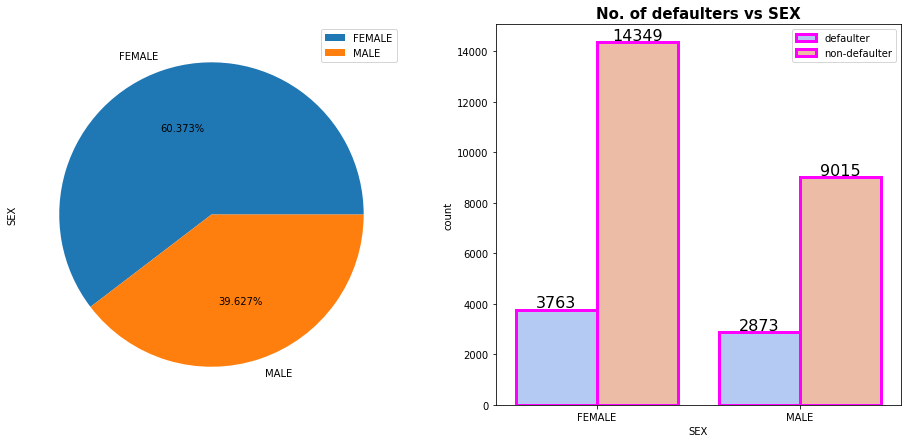

<Figure size 720x360 with 0 Axes>

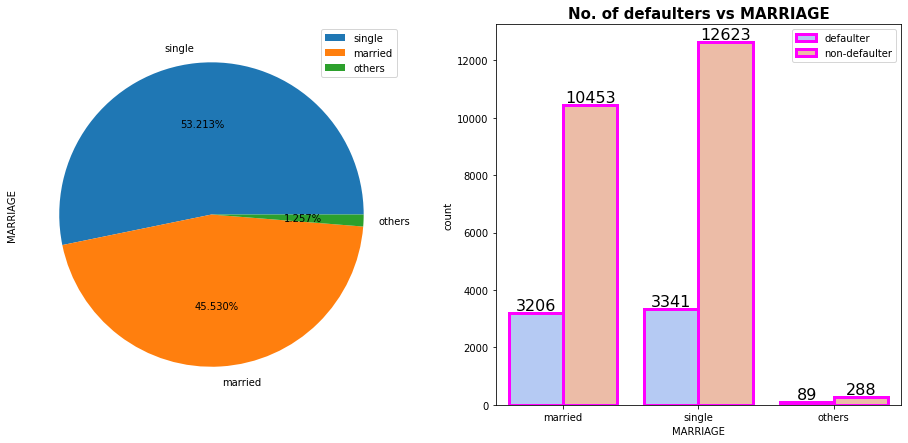

<Figure size 720x360 with 0 Axes>

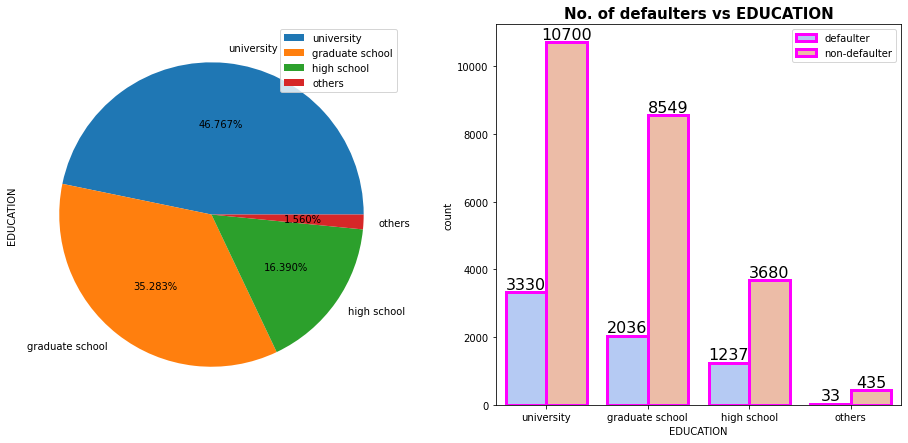

In [480]:
# Now Plotting the value counts of these categorical variables.
# Also visualizing the relationship of these variables with our dependent variable using subplots on the above categorical dataframe.
categorical_features = ['SEX','MARRIAGE','EDUCATION']
for col in categorical_features:
  plt.figure(figsize=(10,5))
  fig, axes = plt.subplots(ncols=2,figsize=(16,7))

  # Plotting the value counts of categorical variables using pie chart.
  df[col].value_counts().plot(kind="pie",autopct='%1.3f%%',ax = axes[0],subplots=True, legend=True)

  # Plotting the relationship between above categorical features and our dependent variables using count plot. 
  ax = sns.countplot(x=col, data=df,  palette = 'coolwarm', hue="is_defaulter" ,edgecolor = 'magenta',lw =3)
  
  # Setting the legend at the best location and setting the title.
  plt.legend(loc='best')
  plt.title(f'No. of defaulters vs {col}',weight ='bold', fontsize= 15)

# Annotating the counts in countplot charts.
  for p in ax.patches:                               
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2, height+100, '{:1.0f}'.format(height),ha = "center", fontsize= 16)

From above graphs we can see draw following insights:

*   There are more females credit card holders, and therefore there are more female defaulters.
*   We can clearly see that single people opt for credit cards more than married people.
*   We can clearly see that higher educated people tend to opt for credit cards more than other people.



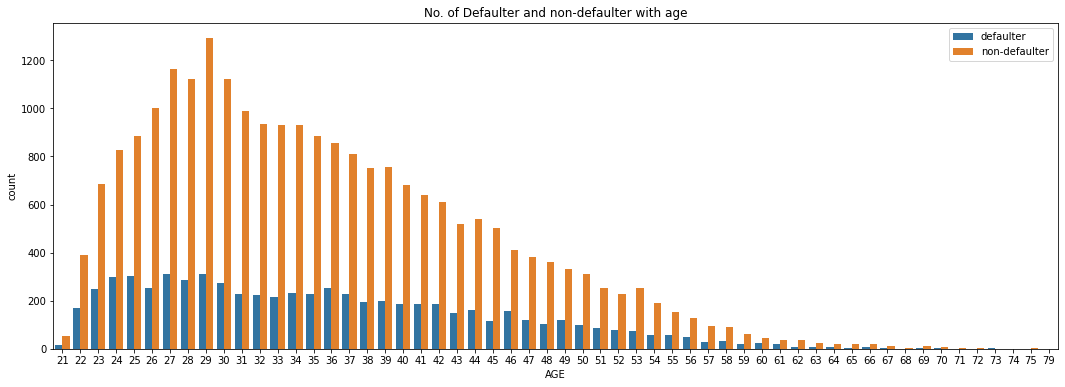

In [423]:
# Checking the relationship between age and our dependent variable.
plt.figure(figsize=(18,6))
ax = sns.countplot(x = 'AGE', hue = 'is_defaulter', data =df, lw=2)
ax.legend(loc='upper right')
plt.title('No. of Defaulter and non-defaulter with age')
plt.show()

In [424]:
# Now lets explore LIMIT_BAL column which contains the credit limit data of our clients.
df['LIMIT_BAL'].describe()

count      30000.000000
mean      167484.322667
std       129747.661567
min        10000.000000
25%        50000.000000
50%       140000.000000
75%       240000.000000
max      1000000.000000
Name: LIMIT_BAL, dtype: float64

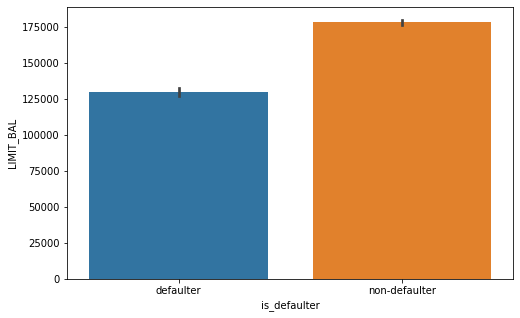

In [425]:
plt.figure(figsize=(8,5))
sns.barplot(x='is_defaulter', y='LIMIT_BAL', data=df)

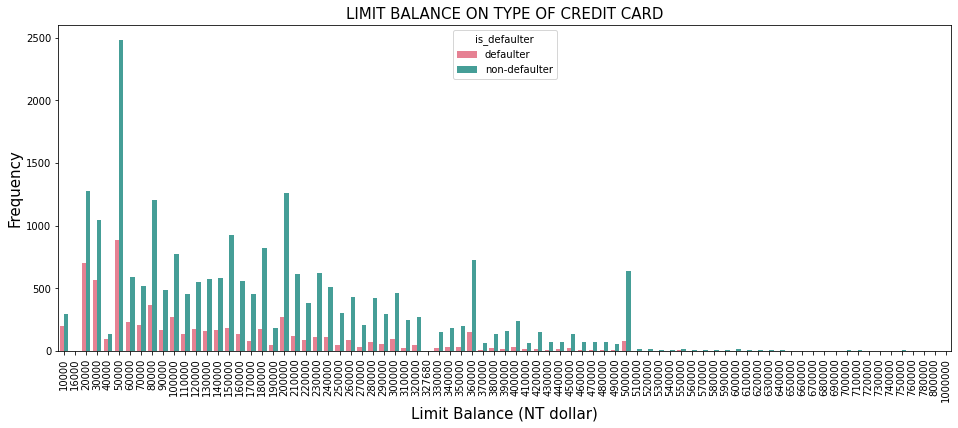

In [426]:
# plotting the count plot to vizualize the data distribution with respect to Limit Balance

plt.figure(figsize=[16, 6]) 
sns.countplot( x='LIMIT_BAL', hue = 'is_defaulter',data =df, palette = 'husl')
plt.xticks(rotation = 90)                       # Rotate the value of x-ticks so values annotated on x-axis don't get squashed together.
plt.xlabel('Limit Balance (NT dollar)', SIZE=15)  
plt.ylabel('Frequency', SIZE=15) 
plt.title('LIMIT BALANCE ON TYPE OF CREDIT CARD', SIZE=15)
plt.show()

### **Payment Status History**

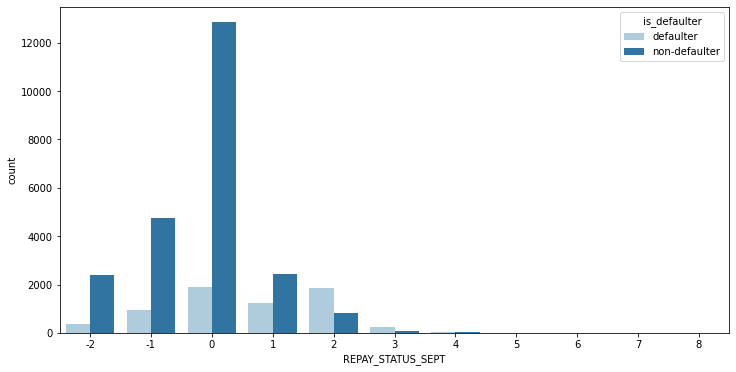

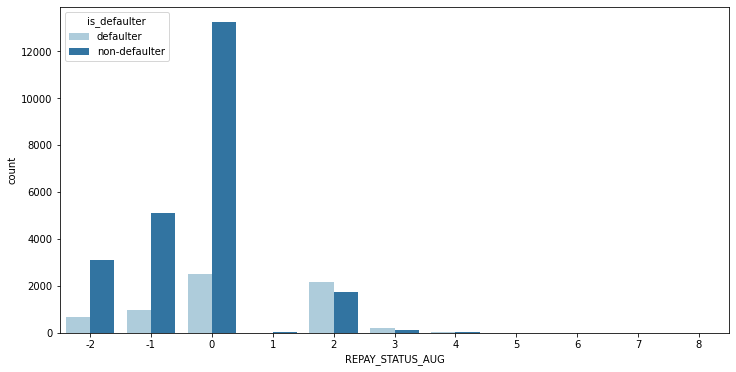

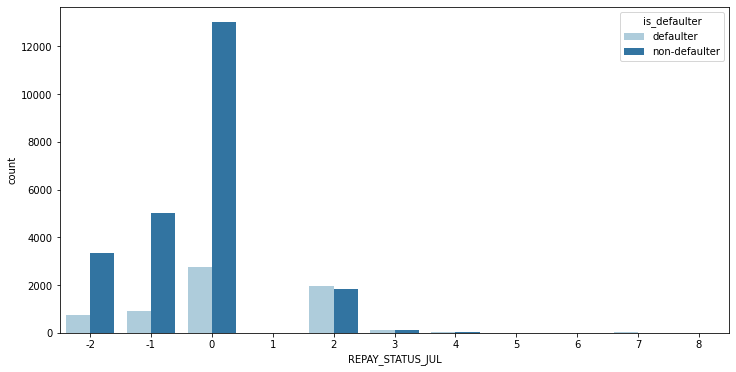

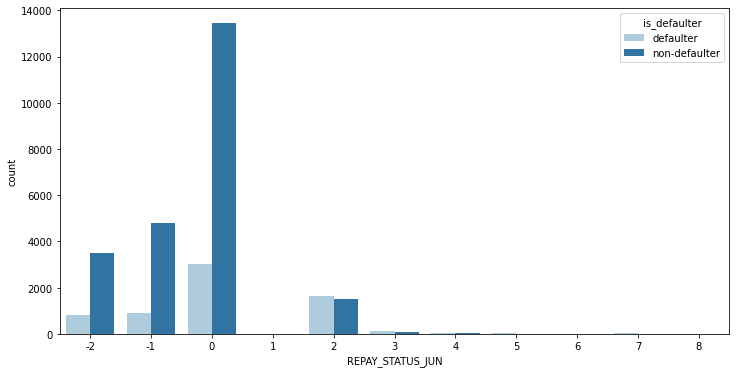

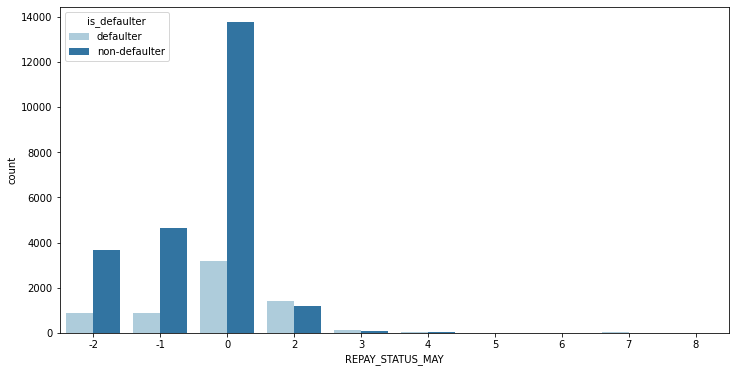

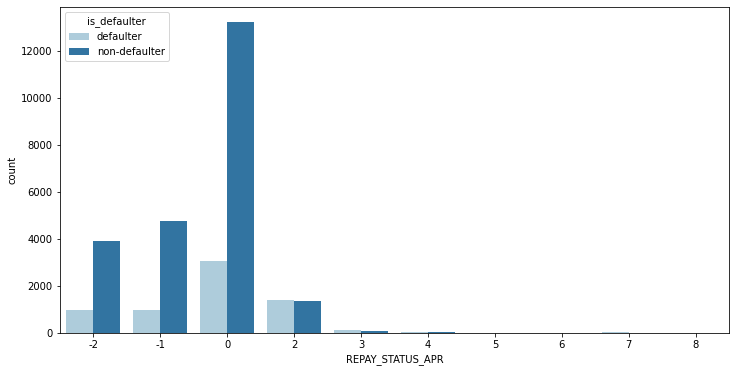

In [427]:
# Looking at the repayment columns for each month.
repayment_feature_list = ['REPAY_STATUS_SEPT',	'REPAY_STATUS_AUG',	'REPAY_STATUS_JUL',	'REPAY_STATUS_JUN',	'REPAY_STATUS_MAY',	'REPAY_STATUS_APR']

# Plotting graph for each payment feature.
for pay_column in repayment_feature_list:
  plt.figure(figsize=(12,6))
  sns.countplot(x = pay_column, hue = 'is_defaulter', data = df ,palette = 'Paired')

From above graph it is clear that most often when there is a delay in payment, there is a delay of 2 months. Also we can see that most of our users have revolving credit(value 0) which is defined as credit that is automatically renewed as debts are paid off. 

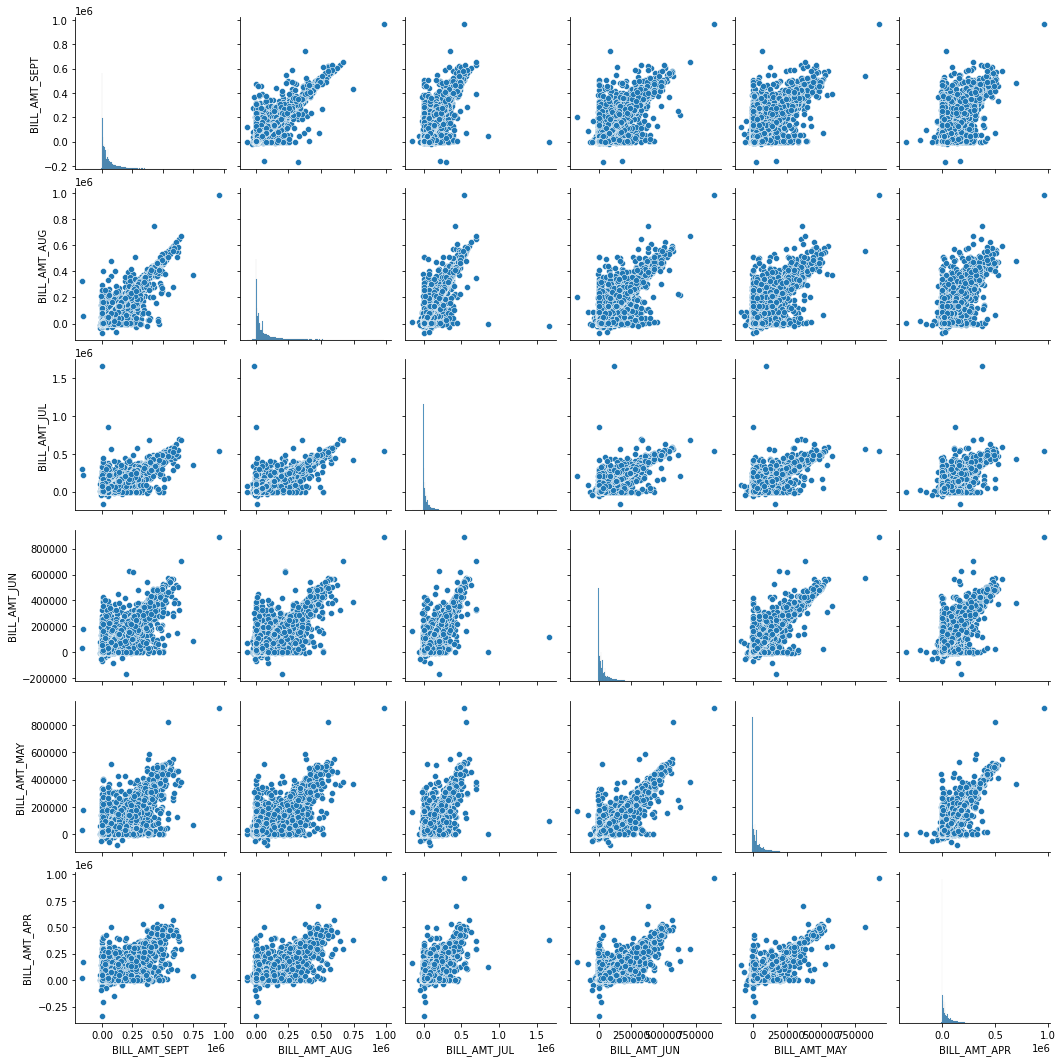

In [428]:
# Lets now check the bill amount features.
# Assigning the bill amount features to a single variable 

df_bill_amount = df[['BILL_AMT_SEPT', 'BILL_AMT_AUG', 'BILL_AMT_JUL', 'BILL_AMT_JUN', 'BILL_AMT_MAY', 'BILL_AMT_APR']]
sns.pairplot(data = df_bill_amount)

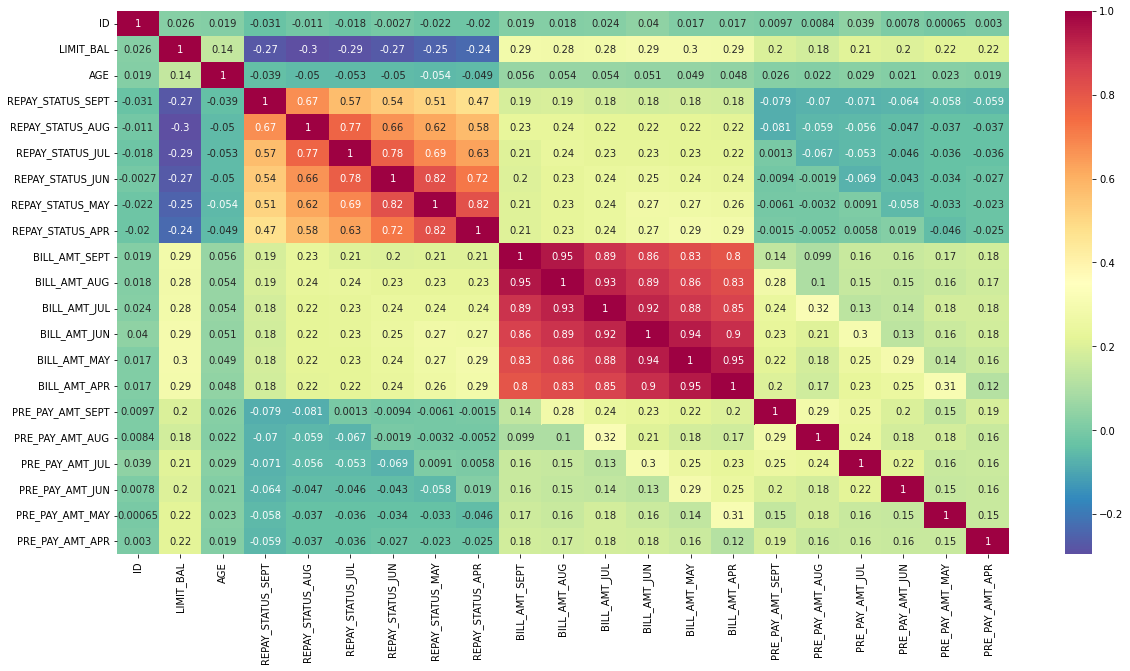

In [429]:
# Checking the correlation between our numerical features.
plt.figure(figsize= (20,10))
correlation= df.corr()
sns.heatmap(correlation, annot=True, cmap='Spectral_r')

### **Detecting outliers in our dataframe**

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21]), <a list of 21 Text major ticklabel objects>)

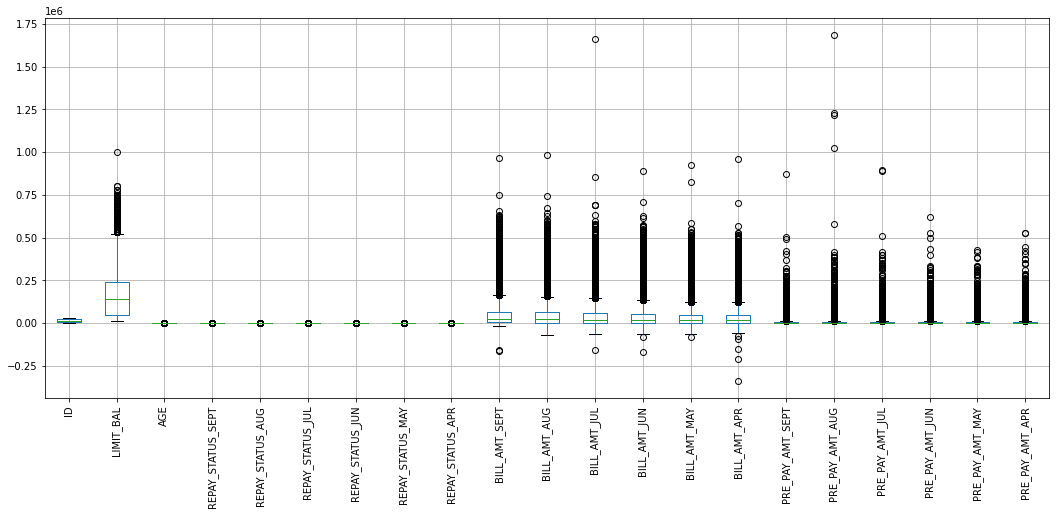

In [430]:
# Draw box plot to see if there is any outliers in our dataset
plt.figure (figsize= (18,7))
df.boxplot()
plt.xticks(rotation=90)
# rotating xticks to 90 degrees. this is done when we want our x-axis label annotators to be vertical 
# because there may not be enough space for us to visualize them. 

From the above boxplot, we can see that there are quite a few outliers present in our features. And most of these outliers are present in features containing Pre-payment and Bill amount data.

In [431]:
# creating a list columns in which outliers are present.
cols = ['LIMIT_BAL', 'BILL_AMT_SEPT','BILL_AMT_AUG', 'BILL_AMT_JUL', 'BILL_AMT_JUN', 'BILL_AMT_MAY',
                 'BILL_AMT_APR', 'PRE_PAY_AMT_SEPT', 'PRE_PAY_AMT_AUG', 'PRE_PAY_AMT_JUL','PRE_PAY_AMT_JUN', 'PRE_PAY_AMT_MAY',
                 'PRE_PAY_AMT_APR']
# using IQR method for dropping outliers from above columns
Q1 = df[cols].quantile(0.25)
Q3 = df[cols].quantile(0.75)

IQR = Q3 - Q1                   # interquartile range

# using interquartile range to find and remove outliers from our dataframe.
df = df[~((df[cols] < (Q1 - 1.5 * IQR)) |(df[cols] > (Q3 + 1.5 * IQR))).any(axis=1)]

In [432]:
# checking the new shape of the data.
df.shape

(19731, 25)